In [259]:
# AgriSmart  Data Analysis
# Objectives
# 1. Load and preprocess the dataset.
# 2. Inspect the data for empty values, wrong data types, wrong data formats, duplicates and outliers.
# 3. Analyze the data to find patterns and relationships.
# 4. Visualize the data to understand trends and distributions.
# 5. Identify which variables most influence fertilizer recommendations.
# 6. Determine the crop type with the highest average soil moisture.
# 7. Suggest appropriate irrigation adjustments for crops experiencing average temperatures above 30°C.
# 8. Save the cleaned and processed data for further analysis.

In [260]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [261]:
# Load the dataset
df = pd.read_csv('climate_action_data.csv ')
# Data inspection
df.head(10)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,1/1/2025,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,1/2/2025,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,1/3/2025,61.24,6.52,21.9,54.6,Tomatoes,36,29.4,IMG-2002
3,SEN-1003,1/4/2025,51.91,6.62,24,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,1/5/2025,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,1/6/2025,20.92,7.08,26.8,66.3,Beans,68,27.8,IMG-2005
6,SEN-1006,1/7/2025,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,1/8/2025,70.63,7.74,31.6,43.1,Lettuce,41,6.4,IMG-2007
8,SEN-1008,1/9/2025,52.08,6.08,22,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,1/10/2025,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [262]:
# Column names, data types and count of non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      913 non-null    object
 1   Date                           909 non-null    object
 2   Soil_Moisture(%)               913 non-null    object
 3   Soil_pH                        913 non-null    object
 4   Temperature(C)                 913 non-null    object
 5   Humidity(%)                    913 non-null    object
 6   Crop_Type                      909 non-null    object
 7   Fertilizer_Recommended(kg/ha)  913 non-null    object
 8   Irrigation_Recommended(mm)     913 non-null    object
 9   Drone_Image_ID                 913 non-null    object
dtypes: object(10)
memory usage: 71.5+ KB


In [263]:
# Descriptive statistics for categorical columns
df.describe()

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
count,913,909,913,913,913,913,909,913,913,913
unique,800,798,750,313,170,448,5,595,243,800
top,SEN-1430,9/10/2026,error,7.54,19.1,56,Wheat,66.9,8,IMG-2430
freq,2,2,5,11,13,8,203,8,11,2


In [264]:
df.shape

(913, 10)

In [265]:
# Remove  white spaces in column names if any
df.columns = df.columns.str.strip()
df.columns

Index(['Sensor_ID', 'Date', 'Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)',
       'Humidity(%)', 'Crop_Type', 'Fertilizer_Recommended(kg/ha)',
       'Irrigation_Recommended(mm)', 'Drone_Image_ID'],
      dtype='object')

In [266]:
# Remove white spaces from data in string columns
# All columns are  objects
for col in df.columns:
    df[col] = df[col].str.strip()

In [267]:
# convert Soil_Moisture(%), Soil_pH, Temperature(C), Humidity(%), Fertilizer_Recommended(kg/ha), Irrigation_Recommended(mm) to float
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')
    
df.dtypes

Sensor_ID                         object
Date                              object
Soil_Moisture(%)                 float64
Soil_pH                          float64
Temperature(C)                   float64
Humidity(%)                      float64
Crop_Type                         object
Fertilizer_Recommended(kg/ha)    float64
Irrigation_Recommended(mm)       float64
Drone_Image_ID                    object
dtype: object

In [268]:
# Descriptive statistics for numeric columns
df.describe()

,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,44.470099,6.255639,26.404515,60.095374,87.659692,17.415419
std,20.626613,1.026400,4.931119,17.561515,34.704878,7.105890
min,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,26.520000,5.330000,22.100000,45.900000,58.275000,11.400000
50%,45.185000,6.295000,26.600000,59.400000,86.300000,17.400000
75%,62.420000,7.105000,30.600000,75.325000,117.625000,23.700000
max,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000


In [269]:
# convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df.dtypes

Sensor_ID                                object
Date                             datetime64[ns]
Soil_Moisture(%)                        float64
Soil_pH                                 float64
Temperature(C)                          float64
Humidity(%)                             float64
Crop_Type                                object
Fertilizer_Recommended(kg/ha)           float64
Irrigation_Recommended(mm)              float64
Drone_Image_ID                           object
dtype: object

In [270]:
#check for missing values
print('total missing values:', df.isnull().sum().sum())
df.isnull().sum()

total missing values: 38


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 5
Soil_pH                          5
Temperature(C)                   5
Humidity(%)                      5
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    5
Irrigation_Recommended(mm)       5
Drone_Image_ID                   0
dtype: int64

In [271]:
# Display rows with  missing values
df[df.isnull().any(axis = 1)]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
107,SEN-1107,2025-04-18,NaN,NaN,NaN,NaN,Tomatoes,NaN,NaN,IMG-2107
112,SEN-1112,2025-04-23,75.08,6.68,31.3,56.9,NaN,121.1,12.9,IMG-2112
118,SEN-1118,2025-04-29,NaN,NaN,NaN,NaN,Beans,NaN,NaN,IMG-2118
244,SEN-1244,2025-09-02,NaN,NaN,NaN,NaN,Wheat,NaN,NaN,IMG-2244
265,SEN-1265,2025-09-23,61.85,7.08,33.9,47.7,NaN,107.4,18.6,IMG-2265
317,SEN-1317,2025-11-14,22.13,7.57,28.1,88.5,NaN,125.6,13.1,IMG-2317
321,SEN-1321,2025-11-18,60.02,7.84,18.1,77.0,NaN,92.8,10.2,IMG-2321
449,SEN-1449,NaT,15.85,6.66,19.4,51.5,Tomatoes,72.2,23.8,IMG-2449
456,SEN-1456,NaT,10.79,5.20,25.9,43.3,Tomatoes,120.3,14.9,IMG-2456
459,SEN-1459,2026-04-05,NaN,NaN,NaN,NaN,Lettuce,NaN,NaN,IMG-2459


In [272]:
# Fill missing values in numeric columns with the median
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())
    
# Fill missing values in Crop_Type with the mode
df['Crop_Type'] = df['Crop_Type'].fillna(df['Crop_Type'].mode()[0])

df.isnull().sum()

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [273]:
# remove outliers
numeric_cols = df.select_dtypes(include = np.number).columns.tolist()
print('Numeric columns:', numeric_cols)
for col in numeric_cols:
    mean = df[col].mean()
    std = df[col].std()
    df[col] = np.where((df[col] < mean - 3*std) | (df[col] > mean + 3*std), np.nan, df[col])
    df[col] = df[col].fillna(df[col].median())

Numeric columns: ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']


In [274]:
# duplicates
print('total duplicates:', df.duplicated().sum())

total duplicates: 111


In [275]:
# drop duplicates
df = df.drop_duplicates()
print('total duplicates:', df.duplicated().sum())
df.shape

total duplicates: 0


(802, 10)

In [276]:
# Check for  date duplicates
df[df.duplicated(subset=['Date'])]

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
456,SEN-1456,NaT,10.79,5.20,25.9,43.3,Tomatoes,120.3,14.9,IMG-2456
484,SEN-1484,NaT,50.90,5.64,27.2,34.1,Lettuce,105.0,10.2,IMG-2484
801,SEN-1510,NaT,52.94,4.78,20.4,43.8,Beans,84.1,28.1,IMG-2510


In [277]:
# Final clean dataset
print(df.info())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 802 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Sensor_ID                      802 non-null    object        
 1   Date                           798 non-null    datetime64[ns]
 2   Soil_Moisture(%)               802 non-null    float64       
 3   Soil_pH                        802 non-null    float64       
 4   Temperature(C)                 802 non-null    float64       
 5   Humidity(%)                    802 non-null    float64       
 6   Crop_Type                      802 non-null    object        
 7   Fertilizer_Recommended(kg/ha)  802 non-null    float64       
 8   Irrigation_Recommended(mm)     802 non-null    float64       
 9   Drone_Image_ID                 802 non-null    object        
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 68.9+ KB
None


Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64

In [278]:
#Analysis
#Descriptive statistics for numeric columns
df.select_dtypes(include=[np.number]).describe()

,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,802.000000,802.000000,802.000000,802.000000,802.000000,802.000000
mean,44.766353,6.249084,26.461471,60.033292,87.460723,17.392269
std,20.460694,1.021579,4.863302,17.416061,34.765497,7.140127
min,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,26.947500,5.330000,22.300000,46.025000,57.925000,11.300000
50%,45.230000,6.285000,26.600000,59.500000,85.950000,17.400000
75%,62.555000,7.080000,30.600000,75.275000,117.675000,23.700000
max,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000


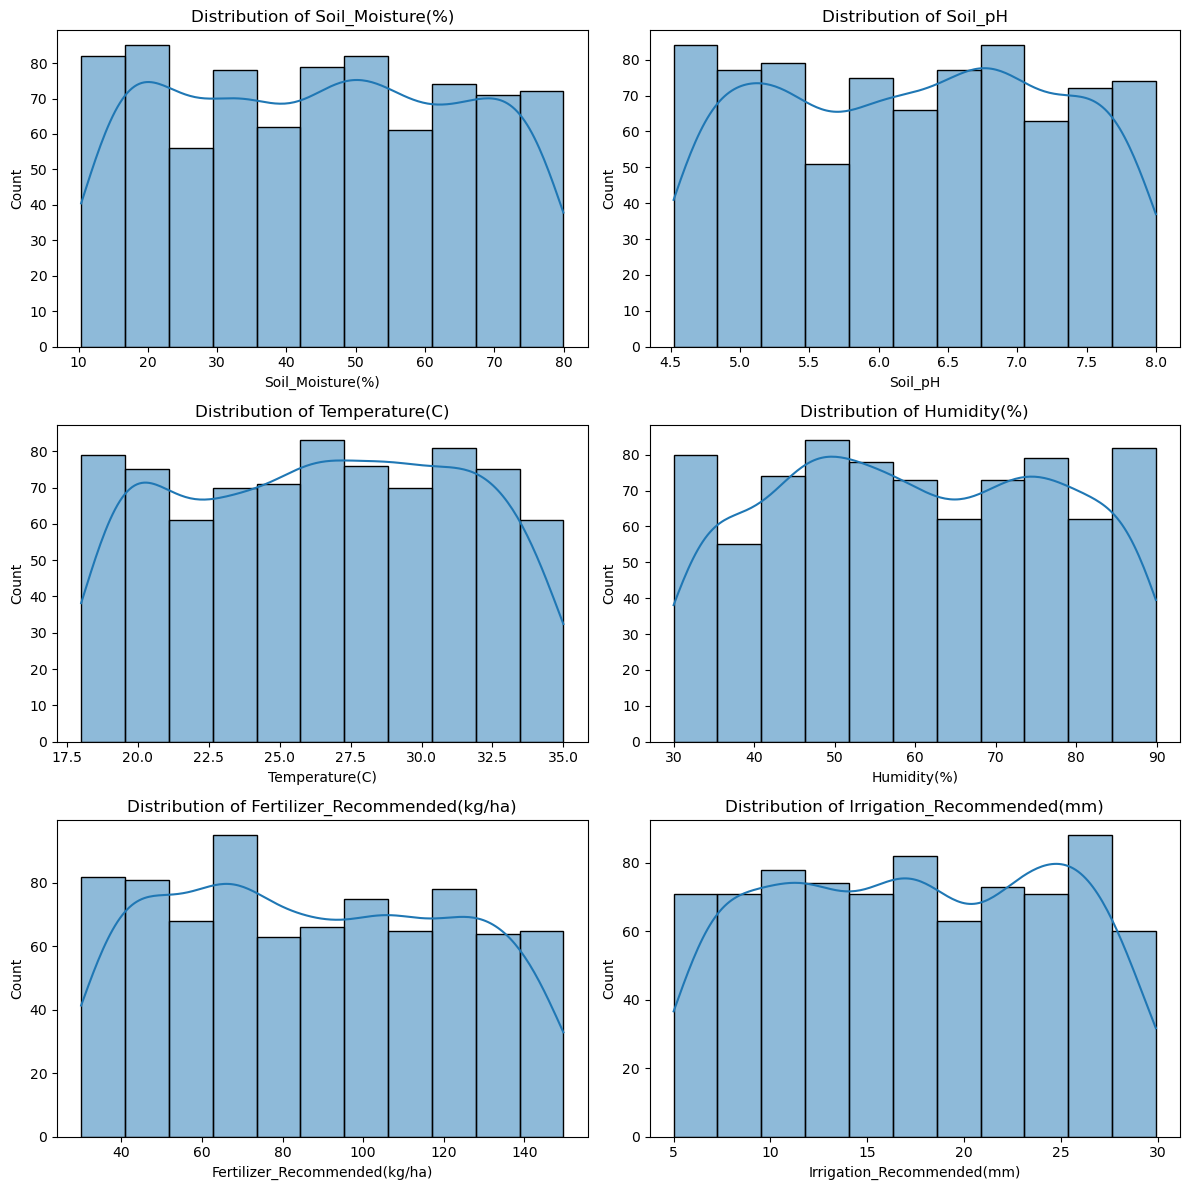

In [279]:
# Distribution of numeric columns
numeric_cols = df.select_dtypes(include='number').columns.tolist()
n_cols = 2 
n_rows = math.ceil(len(numeric_cols) / n_cols)  # ceiling division for rows


fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # converts the 2D array into a 1D array for easy indexing

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


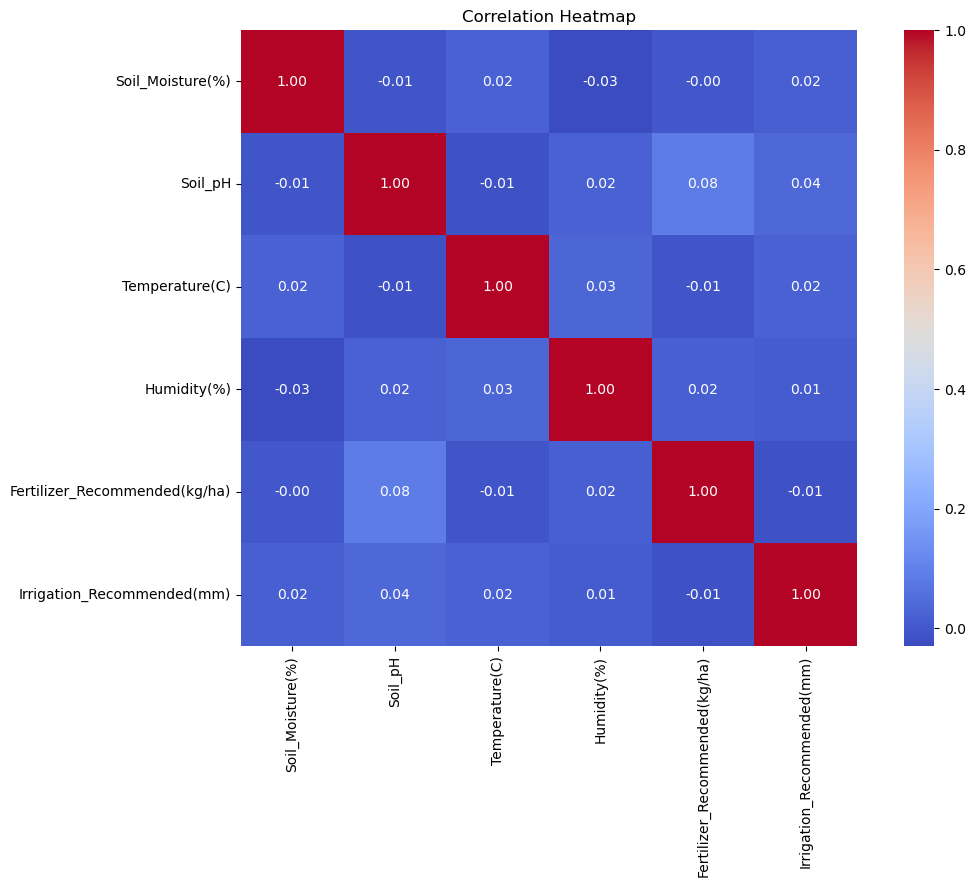

In [280]:
# Correlation analysis
corr_matrix = df[numeric_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [281]:
# soil moisture by crop type
crop_moisture = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(crop_moisture)


Crop_Type
Wheat       47.356449
Maize       44.953581
Beans       44.394375
Tomatoes    43.817946
Lettuce     42.984868
Name: Soil_Moisture(%), dtype: float64


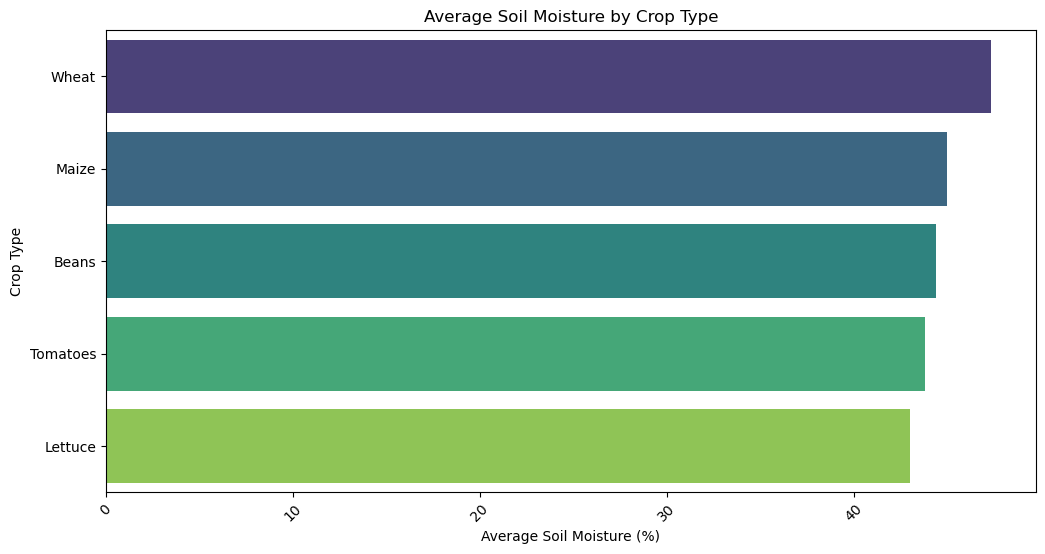

In [282]:
# Visualize with a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(y=crop_moisture.index, x=crop_moisture.values, hue=crop_moisture.index, palette='viridis')
plt.title('Average Soil Moisture by Crop Type')
plt.ylabel('Crop Type')
plt.xlabel('Average Soil Moisture (%)')
plt.xticks(rotation=45)
plt.show()

(227, 10)


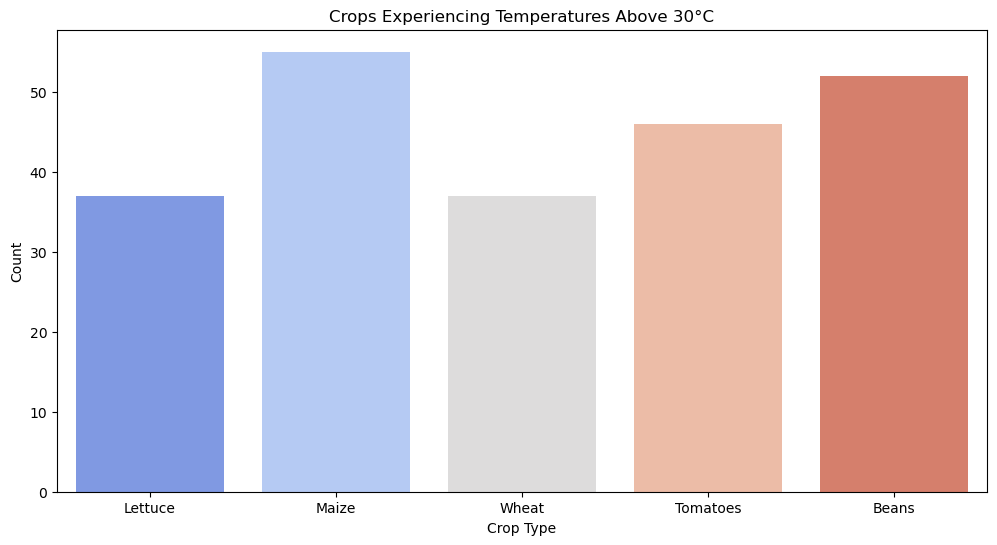

In [283]:
# crops experiencing average temperatures above 30°C
high_temp_crops = df[df['Temperature(C)'] > 30]
print(high_temp_crops.shape)
# Visualize the count of each crop type with high temperature
plt.figure(figsize=(12, 6))
sns.countplot(data=high_temp_crops, x='Crop_Type', palette='coolwarm', hue ='Crop_Type')
plt.title('Crops Experiencing Temperatures Above 30°C')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.show()

In [284]:
# Key Findings
# 1. The dataset has been cleaned and preprocessed, with missing values filled and outliers removed.
# 2. The average soil moisture varies significantly by crop type, with some crops requiring more moisture than others.
# 3. The correlation analysis shows relationships between variables, with Soil_pH being particularly relevant for fertilizer recommendations.
# 4. Wheat has the highest average soil moisture(47.356449).
# 5. Crops experiencing average temperatures above 30°C have been identified, and irrigation adjustments may be necessary for these crops.
# 6. Maize shows the highest frequency of crops experiencing high temperatures, highlighting the need for careful monitoring and appropriate irrigation adjustments.
# 7. The cleaned dataset is ready for further analysis or modeling.

In [285]:
# Recommendations
# 1. Regularly monitor soil moisture levels, especially for crops that require higher moisture.
# 2. Implement irrigation systems that can adjust based on real-time temperature and soil moisture data.
# 3. Consider the correlation between Soil_pH and fertilizer recommendations to optimize fertilizer use.
# 4. For crops experiencing high temperatures, increase irrigation by 2mm per degree above 30°C to prevent stress and yield loss.
# 5. Consider crop-specific irrigation strategies.

In [286]:
# Save the cleaned and processed data
df.to_csv('cleaned_precision_agriculture_data.csv ', index=False)